<a href="https://colab.research.google.com/github/fish34/sberbank_data_analysis/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd # импортируем Pandas
import numpy as np
%matplotlib inline

In [2]:
# считываем данные
# https://www.kaggle.com/c/titanic/data
!git clone https://github.com/fish34/sberbank_data_analysis.git
!ls
data = pd.read_csv('/content/sberbank_data_analysis/data/titanic/train.csv', sep=',', header='infer')

Cloning into 'sberbank_data_analysis'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 17 (delta 3), reused 17 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.
sample_data  sberbank_data_analysis


Описание структуры:

Pclass — класс пассажира (1 — первый, 2 — средний, 3 — третий);

Name — имя;

Sex — пол;

Age — возраст;
Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов 
на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Гипотеза 1: Процент числа выживших пассажиров из Саутгемптона выше, чем из Шербура или Квинстауна.

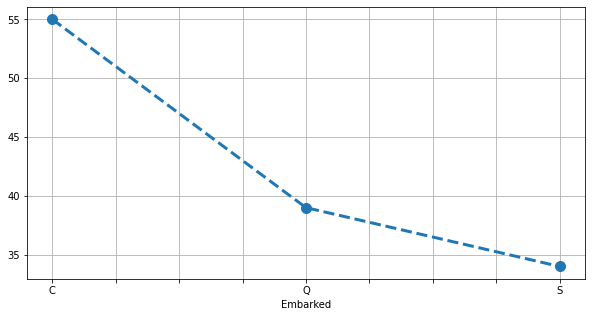

In [66]:
data.groupby(['Embarked'])['PassengerId'].nunique()
series = round(100 * data.groupby(['Embarked'])['Survived'].sum() / data.groupby(['Embarked'])['Survived'].count())
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)


Гипотеза не подтвердилась. Число выживших пассажиров из Саутгемптона оказалось меньше всех.

Гипотеза 2: Больше всего детей было в третьем классе обслуживания

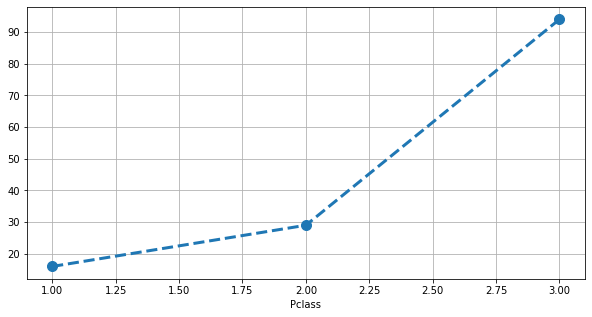

In [97]:
series=data[data['Age']<=18].groupby(['Pclass'])['Age'].count()
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

Гипотеза подтердилась

Гипотеза 3: Возраст пассажиров 3го класса обслуживания меньше, чем второго или третьего

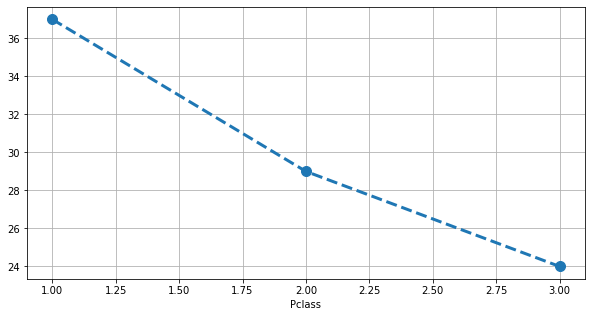

In [115]:
series=data.groupby(['Pclass'])['Age'].median()
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

Гипотеза подтвердилась. Молодых пассажировах в третьем классе ехало больше всего.